In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, lasso_path, lars_path
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Florida Election Data (Simple Linear Regression)

In [4]:
election_data = pd.read_table("florida-election-data.txt", sep="\s+", header=None)
election_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,47300,34062,262,3215,658,42,4,658,21,...,54.846,39.496,0.304,3.728,0.763,0.049,0.005,0.763,0.024,0.023
1,2,2392,5610,73,53,17,3,0,0,3,...,29.335,68.801,0.895,0.650,0.208,0.037,0.000,0.000,0.037,0.037
2,3,18850,38637,248,828,171,18,5,3,37,...,32.050,65.692,0.422,1.408,0.291,0.031,0.009,0.005,0.063,0.031
3,4,3072,5413,65,84,28,2,0,0,3,...,35.437,62.441,0.750,0.969,0.323,0.023,0.000,0.000,0.035,0.023
4,5,97318,115185,570,4470,643,39,11,11,76,...,44.561,52.742,0.261,2.047,0.294,0.018,0.005,0.005,0.035,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,1399,2326,26,29,13,0,1,0,0,...,36.874,61.307,0.685,0.764,0.343,0.000,0.026,0.000,0.000,0.000
63,64,97063,82214,396,2436,3211,33,9888,3,59,...,48.965,41.474,0.200,1.229,1.620,0.017,4.988,0.002,0.030,1.477
64,65,3835,4511,46,149,30,3,2,1,6,...,44.681,52.557,0.536,1.736,0.350,0.035,0.023,0.012,0.070,0.000
65,66,5637,12176,120,265,68,11,3,2,18,...,30.792,66.510,0.655,1.448,0.371,0.060,0.016,0.011,0.098,0.038


49

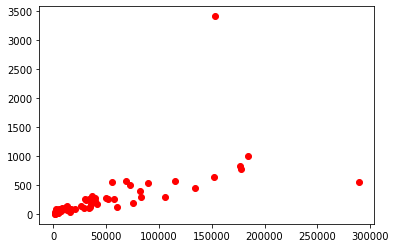

In [5]:
bush = election_data[2]
buchanan = election_data[3]
plt.scatter(bush, buchanan, color='red', linewidth=1)
buchanan.idxmax()

In [6]:
X = np.array(bush).reshape(-1, 1)
y = np.array(buchanan).reshape(-1, 1)
linreg1 = LinearRegression().fit(X, y)

In [7]:
print('R-squared value:', linreg1.score(X,y))
print('Intercept value:', linreg1.coef_[0][0])
print('Coefficient value:', linreg1.intercept_[0])

R-squared value: 0.3889261484072598
Intercept value: 0.004916828108322989
Coefficient value: 45.2898612706191


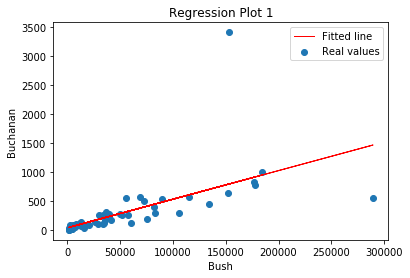

In [8]:
plt.scatter(bush, buchanan)
plt.plot(bush, linreg1.intercept_[0]+linreg1.coef_[0][0]*bush, color='red', linewidth=1)
plt.legend(['Fitted line', 'Real values'])
plt.xlabel('Bush')
plt.ylabel('Buchanan')
plt.title('Regression Plot 1')
plt.show();

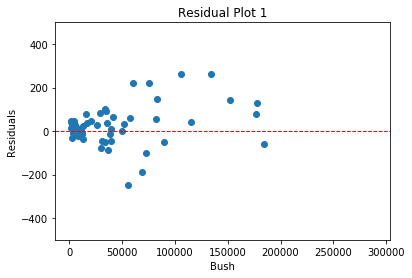

In [9]:
difference = linreg1.intercept_[0]+linreg1.coef_[0][0]*bush - buchanan 
plt.scatter(bush, difference)
plt.axhline(linestyle='--', linewidth=1, color='r') 
plt.ylim(-500, 500)
plt.xlabel('Bush')
plt.ylabel('Residuals')
plt.title('Residual Plot 1');

### What if we modify the Y and X values?

In [12]:
linreg2 = LinearRegression().fit(np.log(X), np.log(y))
print('R-squared value:', linreg2.score(np.log(X),np.log(y)))
print('Intercept value:', linreg2.coef_[0][0])
print('Coefficient value:', linreg2.intercept_[0])

R-squared value: 0.8507857311672755
Intercept value: 0.7577224152020474
Coefficient value: -2.5771235519464426


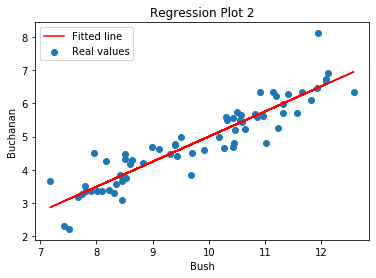

In [13]:
plt.scatter(np.log(bush), np.log(buchanan))
plt.plot(np.log(bush), linreg2.intercept_[0]+linreg2.coef_[0][0]*np.log(bush), color='red')
plt.legend(['Fitted line', 'Real values'])
plt.xlabel('Bush')
plt.ylabel('Buchanan')
plt.title('Regression Plot 2')
plt.show();

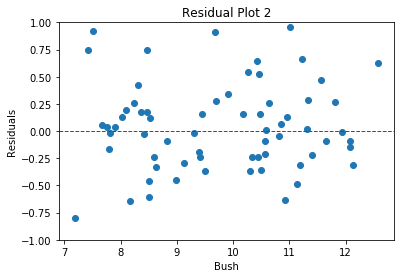

In [14]:
difference = linreg2.intercept_[0]+linreg2.coef_[0][0]*np.log(bush) - np.log(buchanan) 
plt.scatter(np.log(bush), difference)
plt.axhline(linestyle='--', linewidth=1, color='r') 
plt.ylim(-1, 1)
plt.xlabel('Bush')
plt.ylabel('Residuals')
plt.title('Residual Plot 2');

### Regression using Statsmodels

In [21]:
X1 = np.log(election_data[2])
y1 = np.log(election_data[3])
X1 = sm.add_constant(X1.to_numpy())

model = sm.OLS(y1, X1).fit()
predictions = model.predict(X1)

# Print out the statistics
model.summary()
print('Sum of squared residuals:', model.ssr)
prstd, iv_l, iv_u = wls_prediction_std(model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      3   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     370.6
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           1.50e-28
Time:                        16:25:38   Log-Likelihood:                -43.078
No. Observations:                  67   AIC:                             90.16
Df Residuals:                      65   BIC:                             94.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5771      0.389     -6.622      0.000      -3.354      -1.800
x1             0.7577      0.039     19.251      0.000       0.679       0.836
==============================================================================
Omnibus:                        7.531   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                9.036
Skew:                           0.454   Prob(JB):                       0.0109
Kurtosis:                       4.554   Cond. No.                         68.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sum of squared residuals: 14.192807721886519


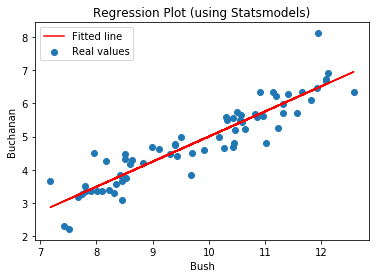

In [22]:
plt.scatter(np.log(bush), np.log(buchanan))
plt.plot(np.log(bush), model.params['const']+model.params['x1']*np.log(bush), color='red')
plt.legend(['Fitted line', 'Real values'])
plt.xlabel('Bush')
plt.ylabel('Buchanan')
plt.title('Regression Plot (using Statsmodels)')
plt.show();

### Generating prediction intervals

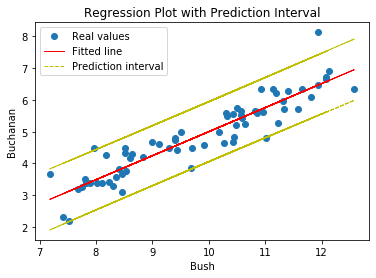

In [23]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

# plt.figure(figsize=(20,15))
plt.plot(np.log(bush), np.log(buchanan), 'o')
plt.plot(np.log(bush), fittedvalues, 'r-', lw=1)
plt.plot(np.log(bush), predict_ci_low, 'y--', lw=1)
plt.plot(np.log(bush), predict_ci_upp, 'y--', lw=1)
plt.legend(['Real values', 'Fitted line', 'Prediction interval'])
plt.xlabel('Bush')
plt.ylabel('Buchanan')
plt.title('Regression Plot with Prediction Interval')
plt.show();

## LASSO Regression

In [24]:
import pandas as pd
url = "http://www.stat.cmu.edu/~larry/all-of-statistics/=data/carmileage.dat"
header = ["MAKE-MODEL","VOL","HP","MPG","SP","WT"]
data = pd.read_csv(url,delim_whitespace=True,skiprows=29,names=header)
data = data.drop(28)

In [26]:
X2 = data[['VOL', 'HP', 'SP', 'WT']]
y2 = data['MPG']
X2_numpy = sm.add_constant(X2)
X2_numpy = X2_numpy.to_numpy()

model = sm.OLS(y2.astype(float), X2_numpy.astype(float)).fit()
predictions = model.predict(X2_numpy.astype(float))

# Print out the statistics
model.summary()
print('Sum of squared residuals:', model.ssr)

C:\Users\Ryann\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     143.8
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           1.21e-34
Time:                        16:25:47   Log-Likelihood:                -214.38
No. Observations:                  81   AIC:                             438.8
Df Residuals:                      76   BIC:                             450.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.7035     22.747      8.296      0.000     143.399     234.008
x1            -0.0121      0.022     -0.549      0.585      -0.056       0.032
x2             0.3806      0.079      4.838      0.000       0.224       0.537
x3            -1.2528      0.237     -5.293      0.000      -1.724      -0.781
x4            -1.8553      0.206     -9.013      0.000      -2.265      -1.445
==============================================================================
Omnibus:                       19.278   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.644
Skew:                           1.038   Prob(JB):                     1.64e-06
Kurtosis:                       4.894   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sum of squared residuals: 943.7553469314141


In [27]:
lasso = Lasso(max_iter=1000000, tol=0.08)
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X2, y2)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.08, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [28]:
lasso_regressor.best_params_

{'alpha': 1}

In [29]:
lasso_regressor.best_score_

-42.232622661081514

In [30]:
lasso = Lasso(alpha=1, max_iter=50000)
lasso.fit(X2, y2)

print('R-squared value:', lasso.score(X2, y2))
print('Intercept value:', lasso.intercept_)
print('Coefficient values:', lasso.coef_)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=50000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

R-squared value: 0.8670654257596335
Intercept value: 116.13585007863993
Coefficient values: [-0.02905952  0.12577686 -0.50091381 -1.22225921]


In [31]:
lasso2 = Lasso(alpha=10, max_iter=50000)
lasso2.fit(X2, y2)

print('R-squared value:', lasso2.score(X2, y2))
print('Intercept value:', lasso2.intercept_)
print('Coefficient values:', lasso2.coef_)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

R-squared value: 0.7941496109929709
Intercept value: 63.26024475323884
Coefficient values: [-0.07740445 -0.0925769   0.         -0.35194223]


In [38]:
from itertools import cycle

Computing regularization path using lasso...


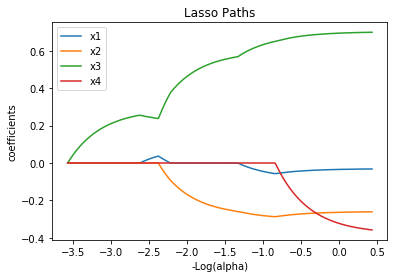

In [65]:
print("Computing regularization path using lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X2, y2, eps=0.0001, fit_intercept=False, n_alphas=1000)

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.legend(['x1', 'x2', 'x3', 'x4'], loc='upper left')
plt.axis('tight')

plt.show();

## Some cool links/books

### Links

For a visually interesting introduction to key concepts in probability and statistics, check out: https://seeing-theory.brown.edu/index.html
 
For more ML specific ideas about prediction intervals, check out:
https://stanfordmlgroup.github.io/projects/ngboost/

More notes about linear regression and its extensions: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

Logistic regression example: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8#:~:text=Logistic%20Regression%20is%20a%20Machine,of%20a%20categorical%20dependent%20variable.

Cool post about LIME (local interpretable model-agnostic explanations): https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/

### Books

The Truth about Linear Regression by Cosma Rohilla Shalizi

All of Statistics by Larry Wasserman

The Elements of Statistical Learning by Trevor Hastie, Robert Tibshirani & Jerome Friedman

Interpretable Machine Learning (https://christophm.github.io/interpretable-ml-book/) by Christoph Molnar